#  **Machine Learning Assignment (AUEB 2023-2024)**  
## **4. K-Nearest neighbours (k-NN) classification**


---



*Yorgos Velissaridis P3210255*

*Evangelos Kleidopoulos P3190084*

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

Here we implement the KNN algorithm.

The fit method just stores the training data.

We then predict by using Euclidean distance between each testing data point and all training points.


$\text{For every i test entry}:$

$\text{For every j train entry}:$

$$\text{Distances} \text{ = }  \sum_{k=1}^{\text{N}}\sqrt{({train_{jk} - test_{ik}})^2}  \text{, for N features}$$

We keep the k-closest neighbors for the testing data and classify them as the class that is most common in their neighbors.

In [3]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        #Calculates the Euclidean distance between the input data point x and each data point in the training set self.X_train.
        #The result is a list of distances, where distances[i] corresponds to the distance between x and the i-th training data point.
        distances = np.linalg.norm(self.X_train - x, axis=1)

        #Sorts the distances and retrieves the indices of the first k smallest distances.
        #These indices correspond to the indices of the k-nearest neighbors in the training set.
        k_indices = np.argsort(distances)[:self.k]

        #Using the indices obtained in the previous step, we retrieve the labels of the k-nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        #Counts the occurrences of each label in k_nearest_labels.
        #It then retrieves the most common label among the k-nearest neighbors.
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common

 We normalize our data and then create the test and train sets.

 We also use a validation set in order to find the best k from 1 to 10.

In [5]:
with open('GTzan_60features_5sec.csv', newline='') as csv_file:
    data = pd.read_csv(csv_file)

X = data.iloc[:, 2:62].values
y = data.iloc[:, 62].values

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Split the data into training and testing and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

#finding the best k by testing on a validation set
best_k = 0
best_accuracy = -1
best_knn = None

for k in range(1, 11):
    knn_classifier = KNNClassifier(k=k)
    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")

    #keeping k with the highest accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_knn = knn_classifier

print(f"\nBest k: {best_k} with Accuracy: {best_accuracy}")

Accuracy for k=1: 0.8826185101580135
Accuracy for k=2: 0.8826185101580135
Accuracy for k=3: 0.8386004514672686
Accuracy for k=4: 0.837471783295711
Accuracy for k=5: 0.8126410835214447
Accuracy for k=6: 0.8171557562076749
Accuracy for k=7: 0.7900677200902935
Accuracy for k=8: 0.781038374717833
Accuracy for k=9: 0.7674943566591422
Accuracy for k=10: 0.7674943566591422

Best k: 1 with Accuracy: 0.8826185101580135


Then we test on the train and test sets.

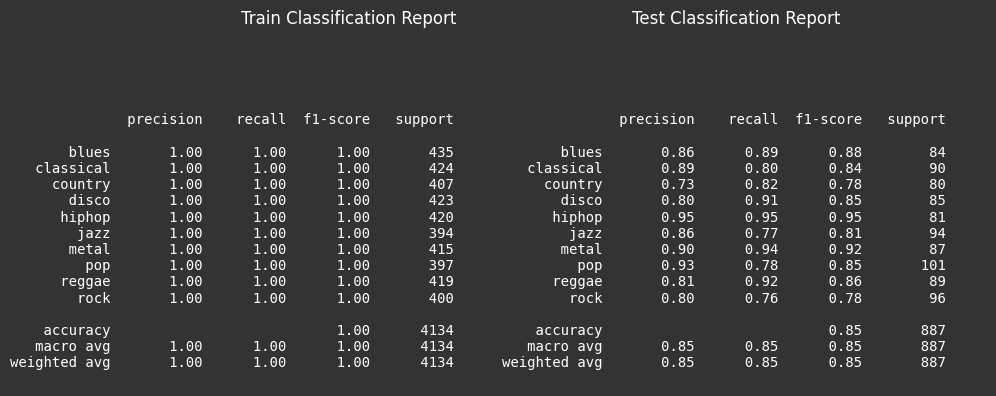

In [6]:
y_pred = best_knn.predict(X_train)
class_report_train = classification_report(y_train, y_pred)

y_pred = best_knn.predict(X_test)
class_report_test = classification_report(y_test, y_pred)

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.set_facecolor('#333333')
# Plot the first classification report
axs[0].text(0.1, 0.1, class_report_train, fontsize=10,color='white', verticalalignment='center', horizontalalignment='center', family='monospace')
axs[0].axis('off')
axs[0].set_title("Train Classification Report",color='white',horizontalalignment='center')

# Plot the second classification report
axs[1].text(0.1, 0.1, class_report_test, fontsize=10,color='white', verticalalignment='center', horizontalalignment='center', family='monospace')
axs[1].axis('off')
axs[1].set_title("Test Classification Report",color='white',horizontalalignment='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Sklearn's `KneighborsClassifier` implementation.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

best_k = 0
best_accuracy = -1
best_knn = None

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_knn = knn

print(f"\nBest k: {best_k} with Accuracy: {best_accuracy}")

y_pred = best_knn.predict(X_test)

Accuracy for k=1: 0.8826185101580135
Accuracy for k=2: 0.8081264108352144
Accuracy for k=3: 0.8081264108352144
Accuracy for k=4: 0.7878103837471784
Accuracy for k=5: 0.7878103837471784
Accuracy for k=6: 0.7742663656884876
Accuracy for k=7: 0.7494356659142212
Accuracy for k=8: 0.7347629796839729
Accuracy for k=9: 0.7302483069977427
Accuracy for k=10: 0.7223476297968398

Best k: 1 with Accuracy: 0.8826185101580135


Finally we compare our test results with Sklearn's for the best k.

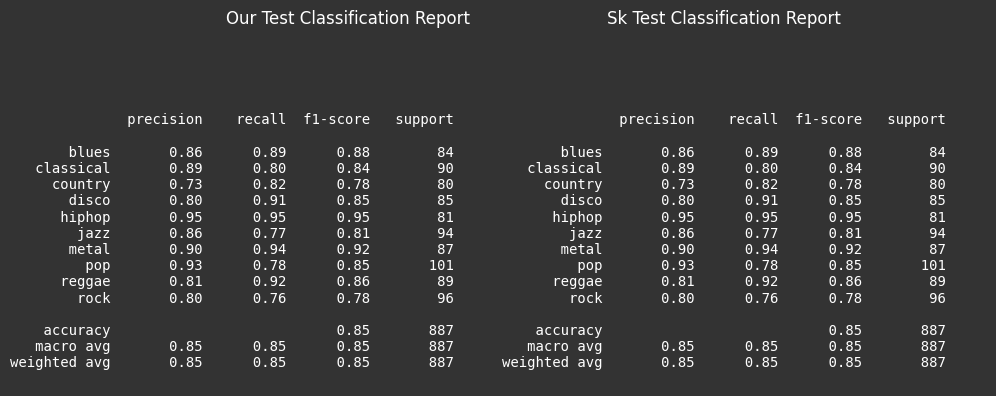

In [8]:
class_report_sk = classification_report(y_test, y_pred)

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.set_facecolor('#333333')
# Plot the first classification report
axs[0].text(0.1, 0.1, class_report_test, fontsize=10,color='white', verticalalignment='center', horizontalalignment='center', family='monospace')
axs[0].axis('off')
axs[0].set_title("Our Test Classification Report",color='white',horizontalalignment='center')

# Plot the second classification report
axs[1].text(0.1, 0.1, class_report_sk, fontsize=10,color='white', verticalalignment='center', horizontalalignment='center', family='monospace')
axs[1].axis('off')
axs[1].set_title("Sk Test Classification Report",color='white',horizontalalignment='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()